In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import warnings as io

In [ ]:
# loading the datasets
loan_train = pd.read_csv('/content/loan-train.csv')
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_test = pd.read_csv('/content/loan-test.csv')
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# finding the missing values in the dataset
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# seeing if any duplicate rows are present in the dataset
duplicates = loan_train.duplicated(subset = ['Loan_ID'])
duplicates.sum()

0

In [ ]:
# checking the statistical values of each column
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From this distribution we can see there is a wide range of applicants with different incomes, the amount of loan taken, and we can see some even

In [ ]:
# Calculating the frequency of each category in the 'Loan_Status' column
loan_status_freq = loan_train['Loan_Status'].value_counts()
print(loan_status_freq)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


#Exploratory Data Analysis(EDA)

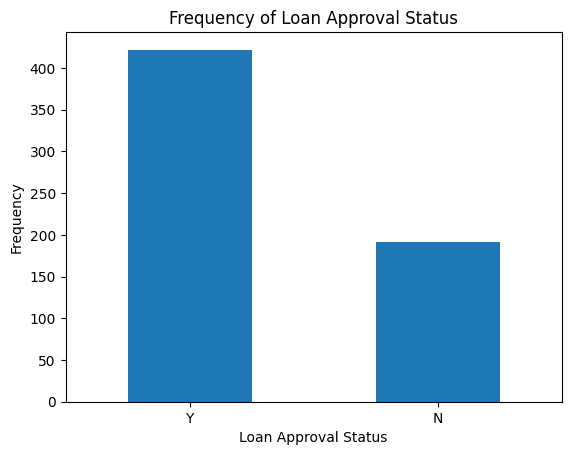

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph
loan_status_freq.plot(kind='bar')
plt.title('Frequency of Loan Approval Status')
plt.xlabel('Loan Approval Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

###Visualizing Categorical Variables

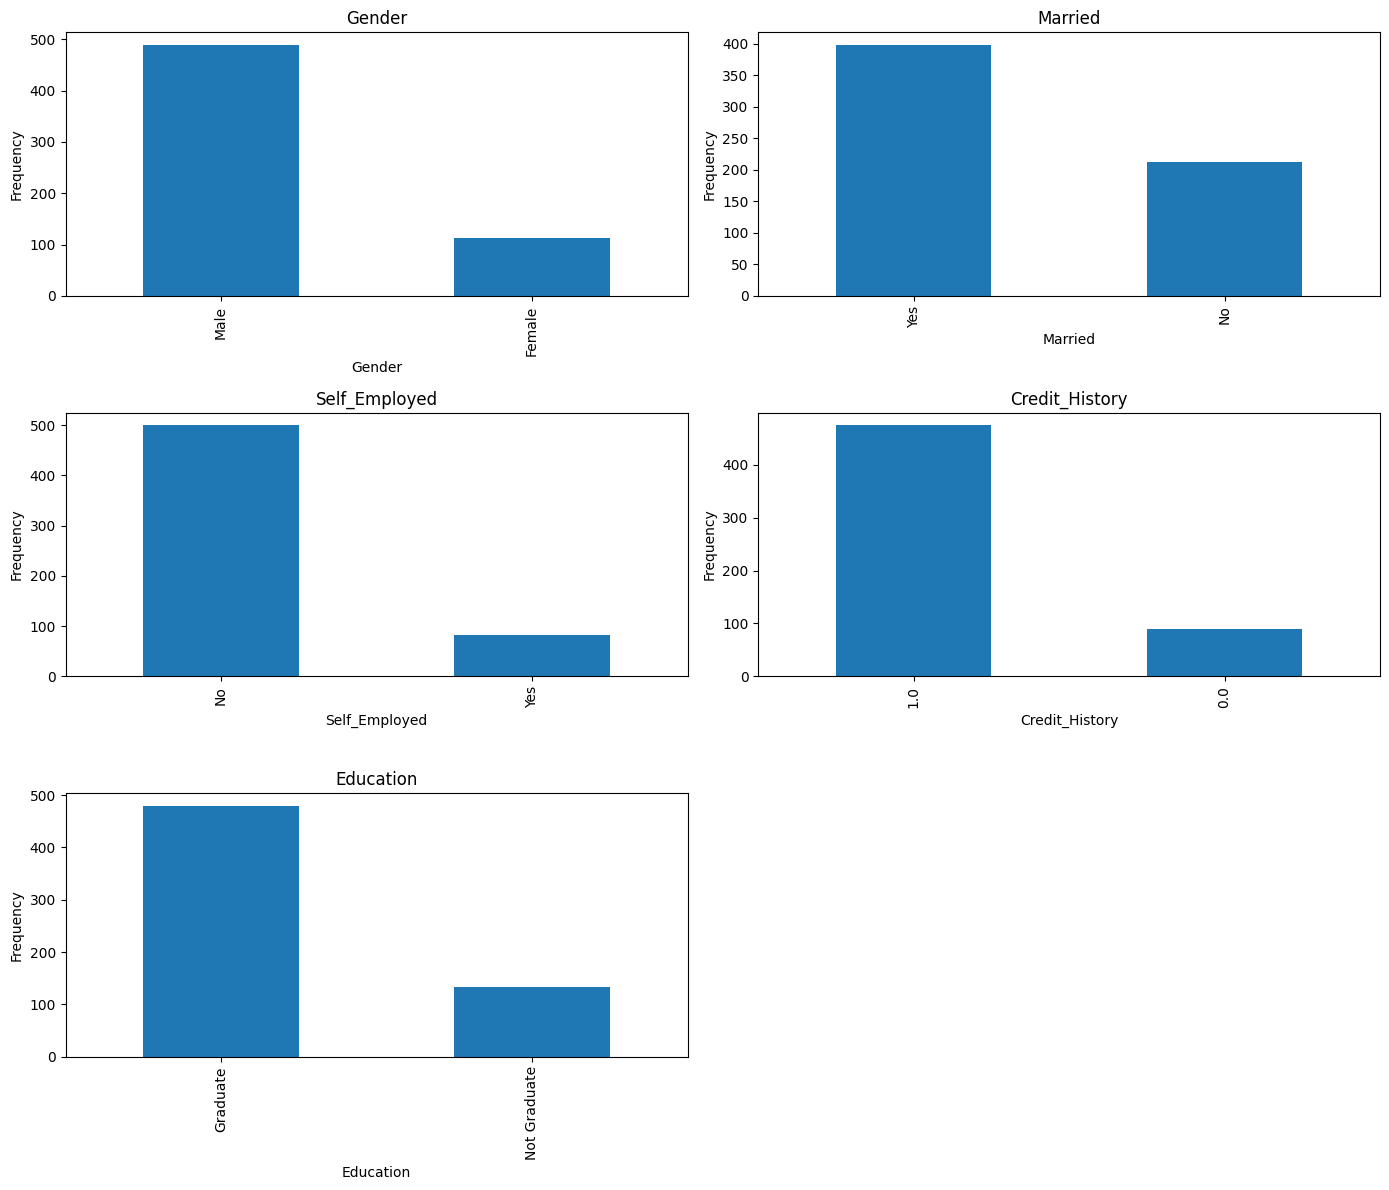

In [ ]:
# Defining the columns to visualize
columns_to_visualize = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education']

# Plotting the graph
plt.figure(figsize=(14, 12))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    loan_train[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Out of the 614 applicants, almost 500 applications are males.

Around 60% of the applicants are married.

Just less than 100 people are self-employed, which is significantly a small number.

Almost all of them have repaid their debt which is a good sign for them as their approval chances are stronger.

There are more number of applicants who are Graduate

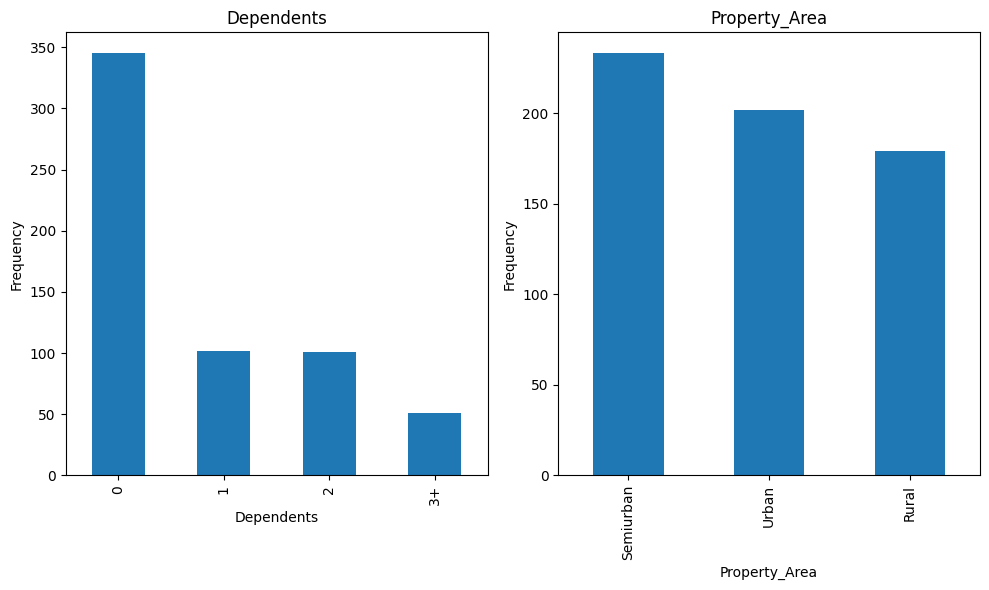

In [ ]:
# Defining the columns to visualize
columns_to_viz = ['Dependents', 'Property_Area']

# Plotting the graph
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_viz, 1):
    plt.subplot(1, 2, i)
    counts = loan_train[column].value_counts()
    counts.plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

More than half of the applicants don't have any dependents.

Majority of the loan applicants are from semi-urban area.

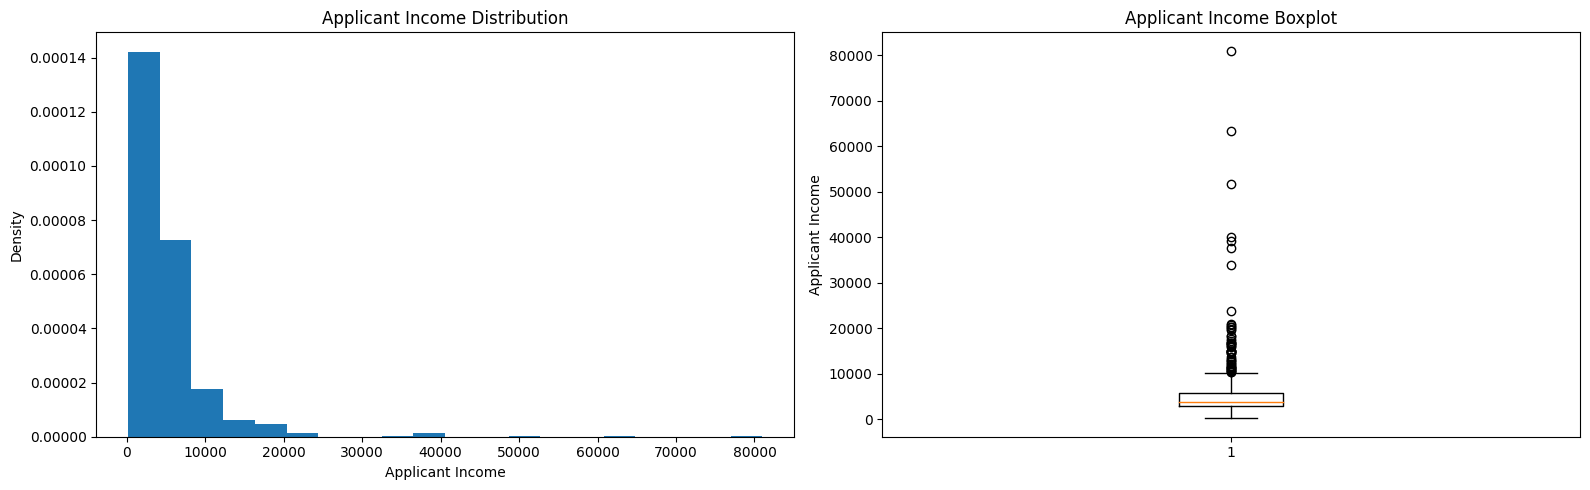

In [ ]:
# Plotting
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
plt.hist(loan_train['ApplicantIncome'],bins=20, density=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Density')

# Box plot
plt.subplot(122)
plt.boxplot(loan_train['ApplicantIncome'])
plt.title('Applicant Income Boxplot')
plt.ylabel('Applicant Income')

plt.tight_layout()
plt.show()

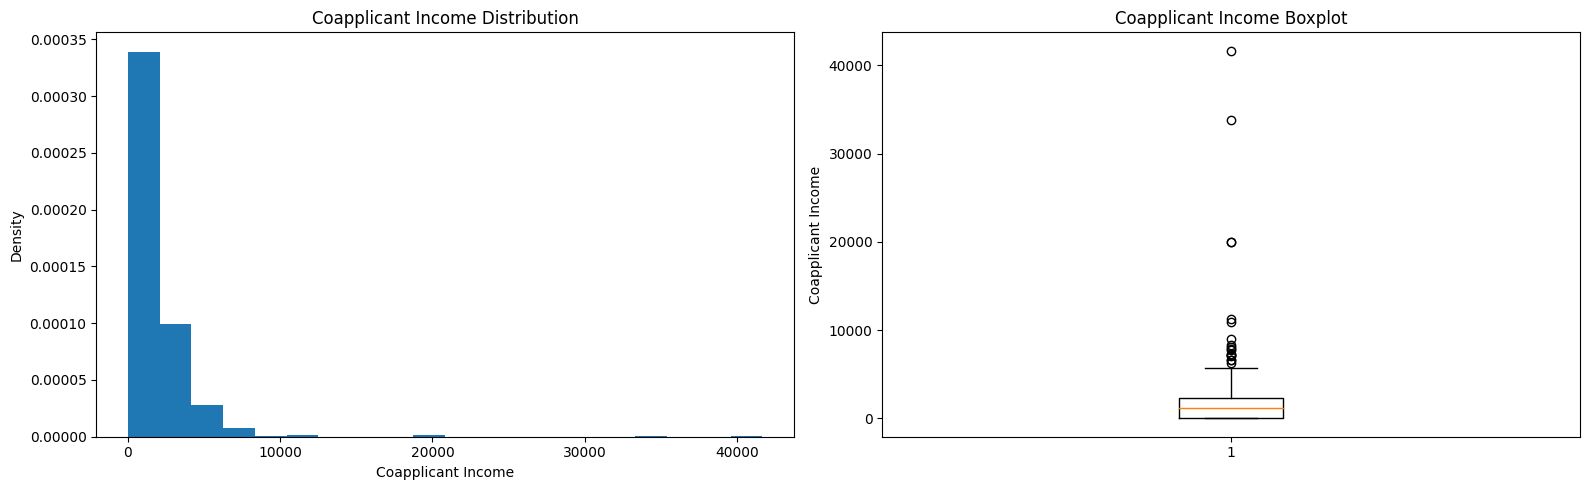

In [ ]:
# Plotting
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
plt.hist(loan_train['CoapplicantIncome'],bins=20, density=True)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Density')

# Box plot
plt.subplot(122)
plt.boxplot(loan_train['CoapplicantIncome'])
plt.title('Coapplicant Income Boxplot')
plt.ylabel('Coapplicant Income')

plt.tight_layout()
plt.show()

The distribution of 'ApplicantsIncome' and 'CoapplicantsIncome' is not normally distributed. We can see there are some outliers present in this data.

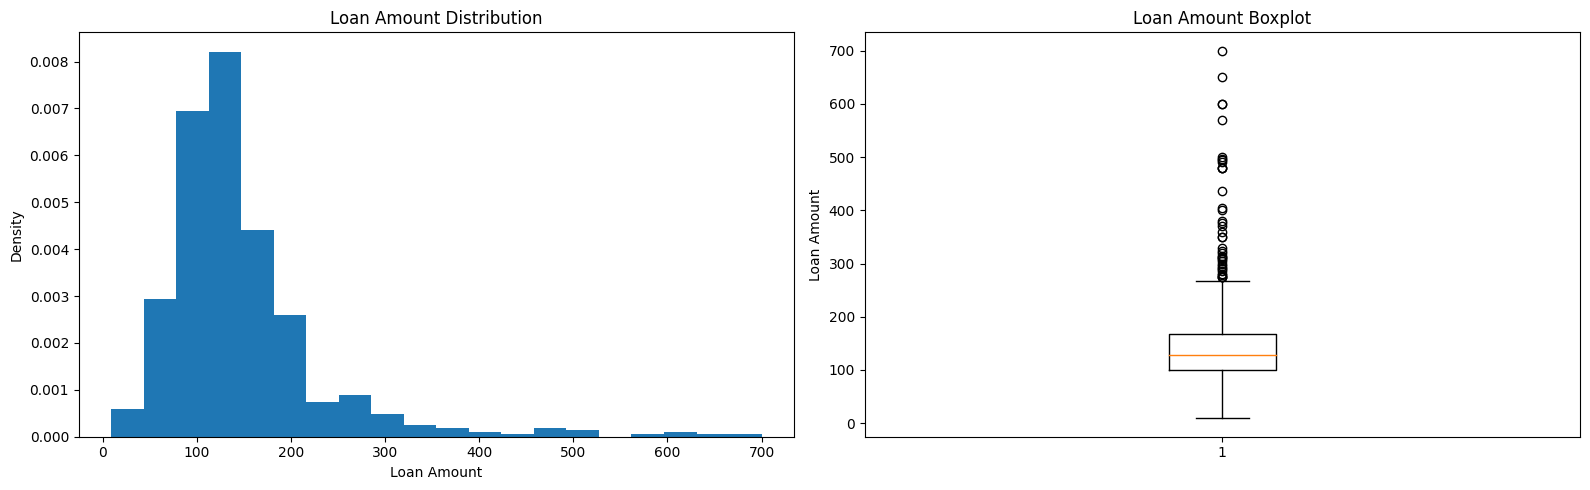

In [ ]:
df = loan_train.dropna(subset=['LoanAmount'], inplace=True)

# Plotting
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
plt.hist(loan_train['LoanAmount'],bins=20, density=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Density')

# Box plot
plt.subplot(122)
plt.boxplot(loan_train['LoanAmount'])
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

For the 'LoanAmount' column, the distribution is fairly normal but here also we can see some outliers present for this data column.

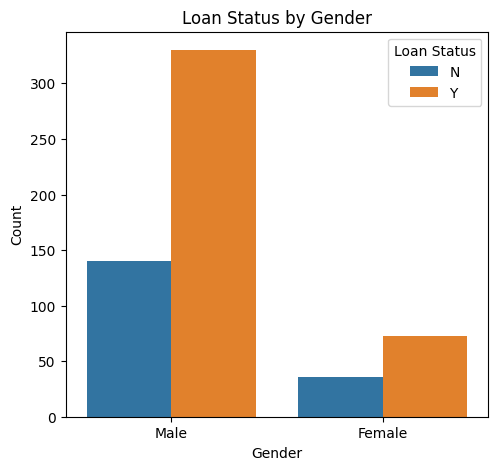

In [ ]:
import seaborn as sns

# Plotting Gender and Loan_Status separately
plt.figure(figsize=(12, 5))

# Plotting Gender and Loan_Status
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')


<Figure size 1000x600 with 0 Axes>

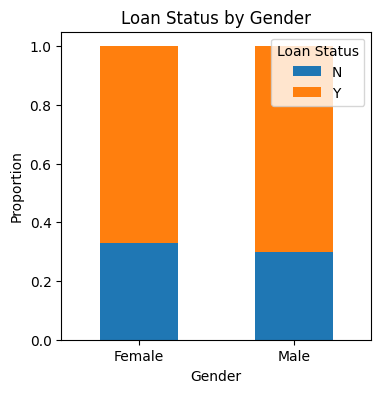

In [ ]:
# Creating a contingency table for Gender and Loan_Status
gender_loan_crosstab = pd.crosstab(loan_train['Gender'], loan_train['Loan_Status'])

# Normalize the contingency table by dividing each row by the sum of that row
gender_loan_normalized = gender_loan_crosstab.div(gender_loan_crosstab.sum(1), axis=0)

# Plotting
plt.figure(figsize=(10, 6))
gender_loan_normalized.plot(kind='bar', stacked=True, figsize=(4, 4))
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()


**Loan Approval by Gender:** The light blue bar shows that a higher proportion of females have loans compared to males.

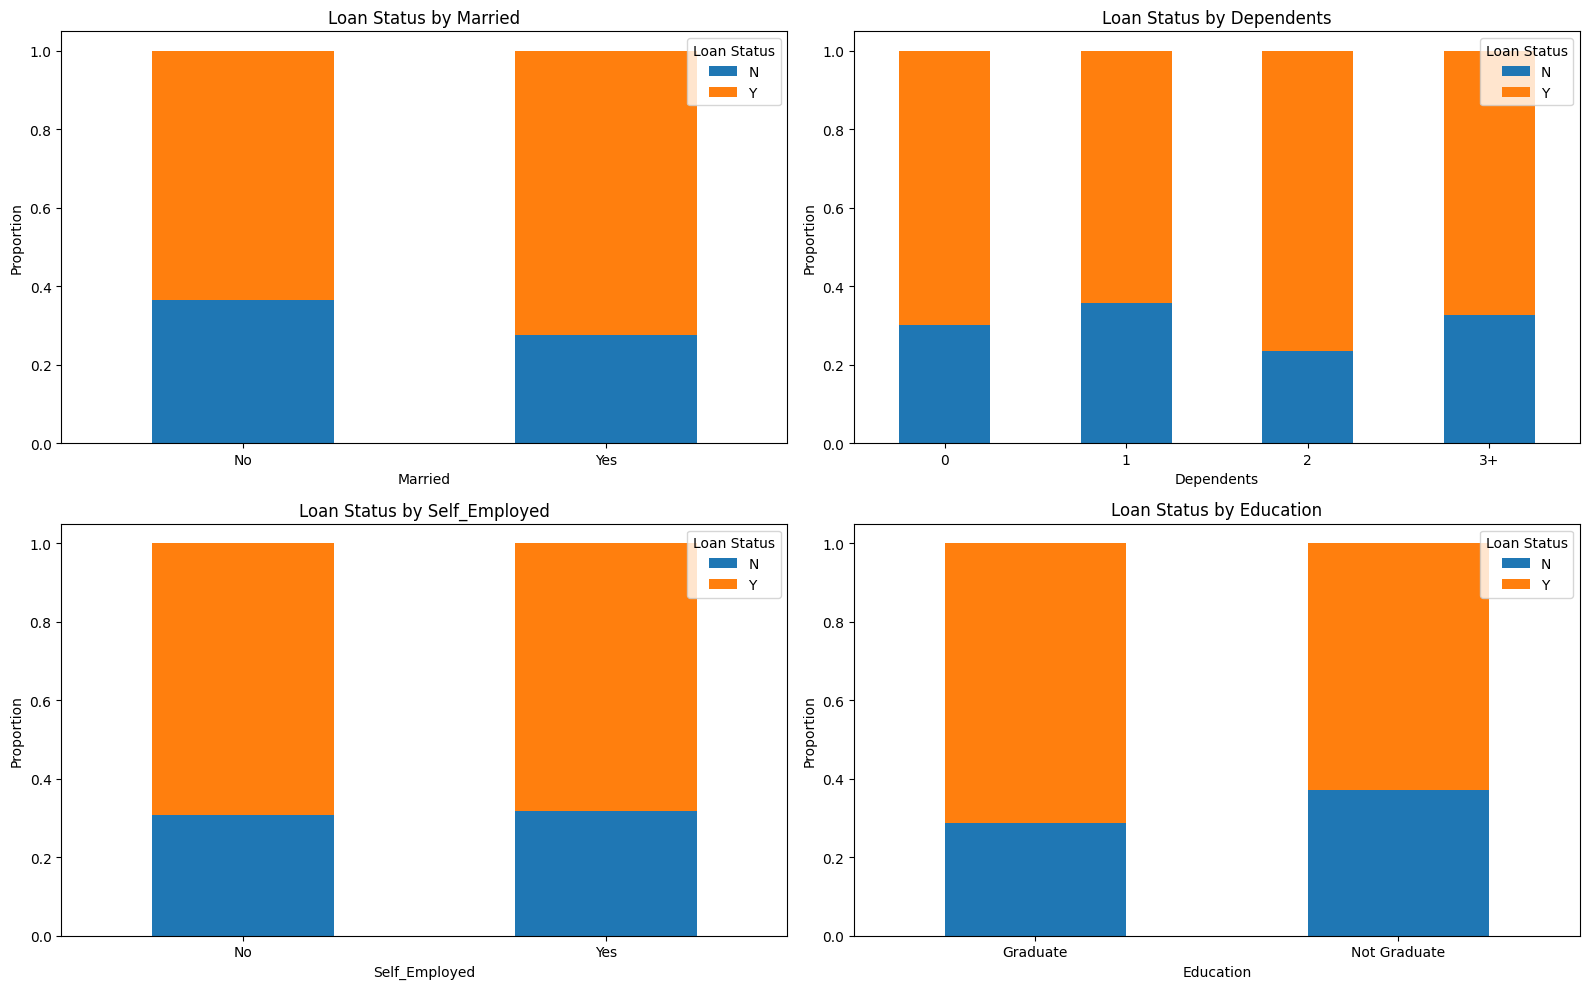

In [ ]:
# Define the remaining categorical variables
categorical_variables = ['Married', 'Dependents', 'Self_Employed', 'Education']

# Plotting
plt.figure(figsize=(16, 10))

for i, column in enumerate(categorical_variables, 1):
    # Create a contingency table for the current categorical variable and Loan_Status
    crosstab_data = pd.crosstab(loan_train[column], loan_train['Loan_Status'])

    # Normalize the contingency table by dividing each row by the sum of that row
    normalized_data = crosstab_data.div(crosstab_data.sum(1), axis=0)

    # Plotting
    plt.subplot(2, 2, i)
    normalized_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Loan Status by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status', loc='upper right')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Loan Status by Married**: The graph shows that a slightly higher proportion of people who are married have a loan compared to those who are not married.

**Loan Status by Dependents**: The graph shows that a slightly higher proportion of people who have dependents have a loan compared to those who do not have dependents.

**Loan Status by Self Employed**: The graph shows that a similar proportion of people who are self-employed have a loan compared to those who are not self-employed.

**Loan Status by Education**: The graph shows that a higher proportion of people who have a graduate education level have a loan compared to those who do not have a graduate education level.

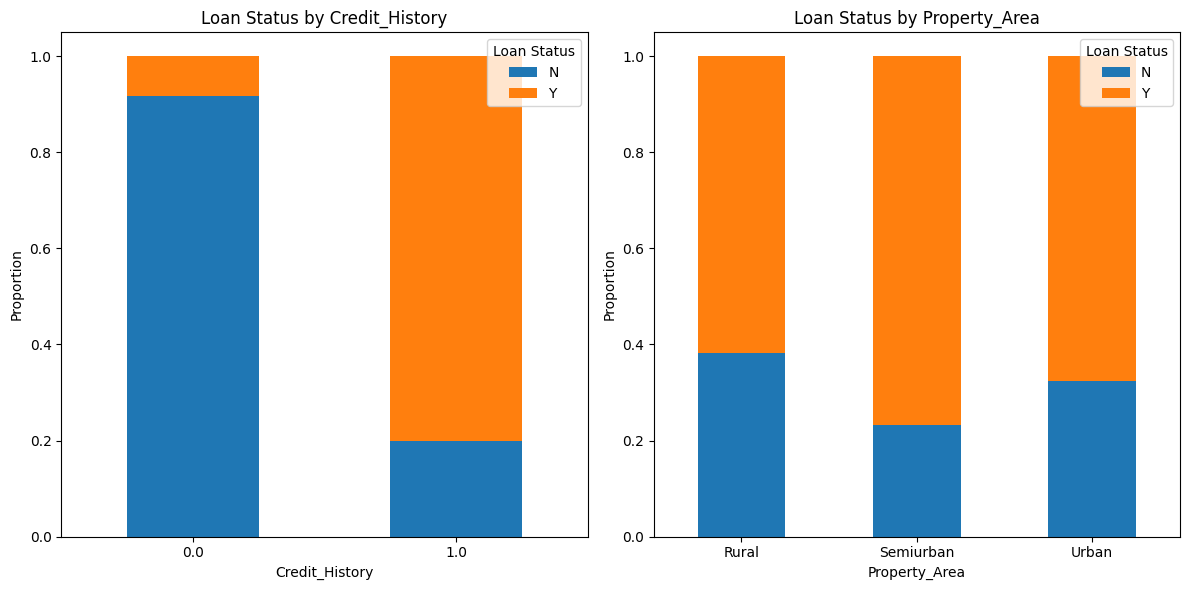

In [ ]:
independent_variables = ['Credit_History', 'Property_Area']

# Plotting
plt.figure(figsize=(12, 6))

for i, column in enumerate(independent_variables, 1):
    # Create a contingency table for the current independent variable and Loan_Status
    crosstab_data = pd.crosstab(loan_train[column], loan_train['Loan_Status'])

    # Normalize the contingency table by dividing each row by the sum of that row
    normalized_data = crosstab_data.div(crosstab_data.sum(1), axis=0)

    # Plotting
    plt.subplot(1, 2, i)
    normalized_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Loan Status by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status', loc='upper right')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

As expected people who previously have a credit history have a high approval chance to get their loan approved.

On the other graph, people from semi-urban area have a better ratio of approval compared to rural and urban.

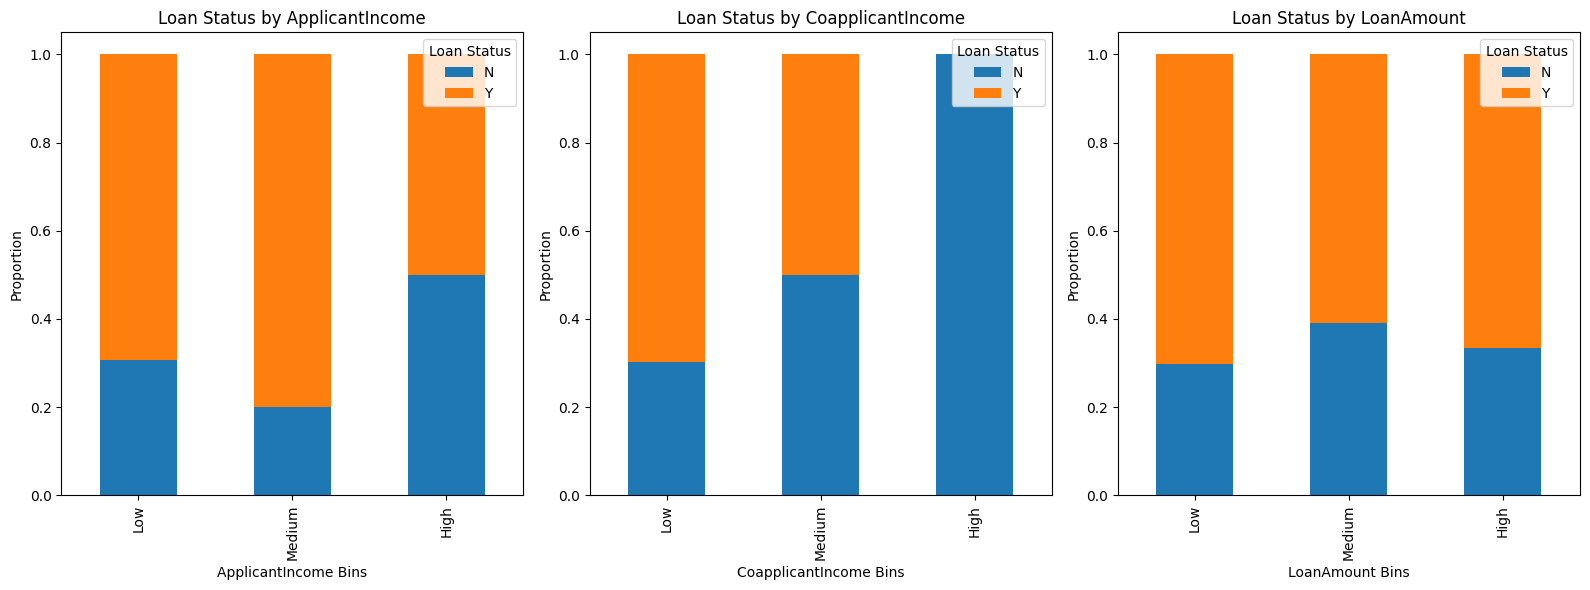

In [ ]:
# Define the numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Define the number of bins and labels for each numerical column
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Plotting
plt.figure(figsize=(16, 6))

for i, column in enumerate(numerical_columns, 1):
    # Create bins with labels for the current numerical column
    bins = pd.cut(loan_train[column], bins=num_bins, labels=bin_labels, include_lowest=True)

    # Create a contingency table for the binned numerical column and Loan_Status
    crosstab_data = pd.crosstab(bins, loan_train['Loan_Status'])

    # Normalize the contingency table by dividing each row by the sum of that row
    normalized_data = crosstab_data.div(crosstab_data.sum(1), axis=0)

    # Plotting
    plt.subplot(1, 3, i)
    normalized_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Loan Status by {column}')
    plt.xlabel(f'{column} Bins')
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status', loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

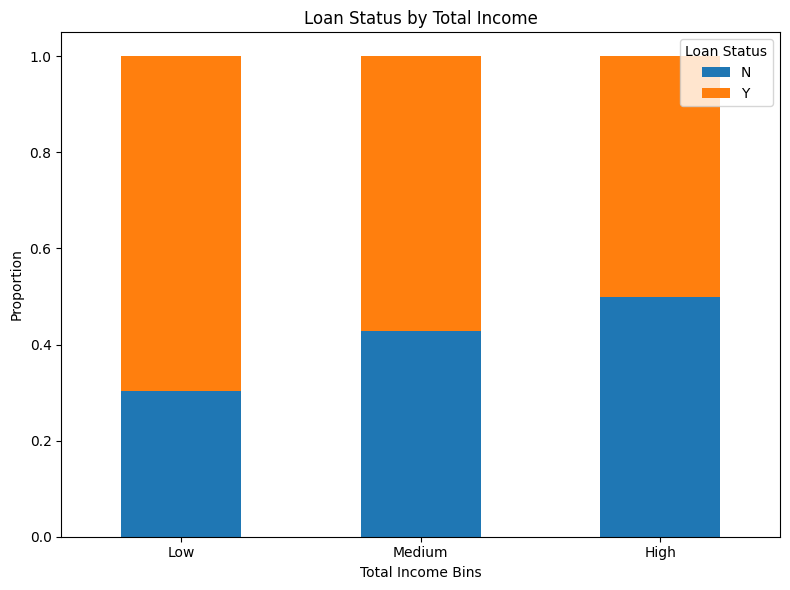

In [ ]:
# Creating a new column 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
loan_train['TotalIncome'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']

# Defining the bins and labels for 'TotalIncome'
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Creating bins with labels for 'TotalIncome'
loan_train['TotalIncomeBins'] = pd.cut(loan_train['TotalIncome'], bins=num_bins, labels=bin_labels, include_lowest=True)

# Plotting
plt.figure(figsize=(8, 6))

# Creating a contingency table for 'TotalIncomeBins' and 'Loan_Status'
crosstab_data = pd.crosstab(loan_train['TotalIncomeBins'], loan_train['Loan_Status'])

# Normalize the contingency table by dividing each row by the sum of that row
normalized_data = crosstab_data.div(crosstab_data.sum(1), axis=0)

# Plotting
normalized_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Total Income')
plt.xlabel('Total Income Bins')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncomeBins
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low


In [ ]:
#Dropping unnecessary columns for correlation matrix
loan_train.drop(columns = ['Loan_ID', 'TotalIncomeBins'], inplace = True)

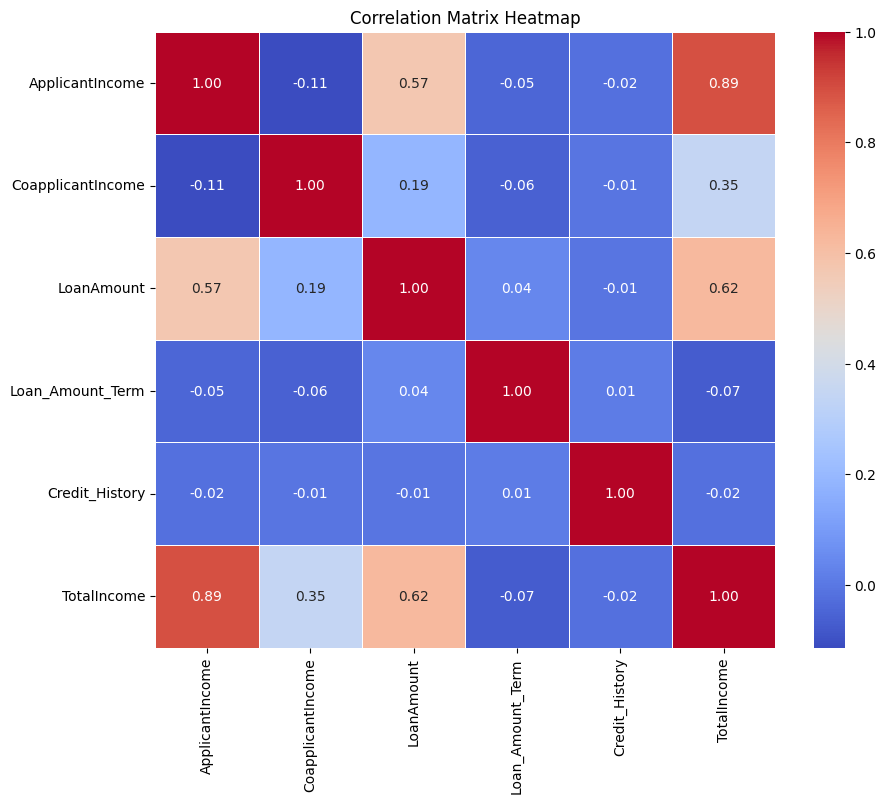

In [ ]:
# Selecting only numerical columns for correlation matrix calculation
numerical_columns = loan_train.select_dtypes(include=['int64', 'float64']).columns

# Computing the correlation matrix
corr_matrix = loan_train[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Income and Loan Amount:** There is a positive correlation between applicant income, coapplicant income, total income and loan amount. This means that as the income levels increase, the loan amount also tends to increase. This is likely because lenders are more likely to approve larger loans to borrowers with higher incomes who can afford to repay them.

**Loan Term and Loan Amount:** There is a weak positive correlation between loan amount and loan term. This means that larger loans tend to have slightly longer terms. This makes sense because larger loans would require more time to repay.

**Credit History and Loan Approval:** There is a weak positive correlation between credit history and all the income related factors (Applicant Income, Coapplicant Income, and Total Income). This means that people with higher credit scores tend to have higher incomes. This may be because people with a history of managing credit responsibly are seen as more financially stable.

**Credit History is Not Strongly Correlated with Other Factors:** While there is a weak positive correlation between credit history and the income variables, it is not very strong. This means that credit history is not the only factor that lenders consider when approving loans. They also consider factors such as income and loan amount.

#Handling Missing Values and Mapping Data

In [ ]:
# imputing missing values for the train dataset
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace = True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace = True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace = True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace = True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace = True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)

# changing Y,N to 1,0 for better understanding by the model
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})



In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    object 
 1   Married            592 non-null    object 
 2   Dependents         592 non-null    object 
 3   Education          592 non-null    object 
 4   Self_Employed      592 non-null    object 
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    object 
 11  Loan_Status        592 non-null    int64  
 12  TotalIncome        592 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 64.8+ KB


In [ ]:
loan_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0


In [ ]:
#Mapping the categorical variables with the integers.
loan_train['Gender'] = loan_train['Gender'].map({'Male':0,'Female':1}).astype(int)
loan_train['Married'] = loan_train['Married'].map({'No':0,'Yes':1}).astype(int)
loan_train['Education'] = loan_train['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
loan_train['Self_Employed'] = loan_train['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
loan_train['Credit_History'] = loan_train['Credit_History'].astype(int)

In [ ]:
loan_train['Property_Area'] = loan_train['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
loan_train['Dependents'] = loan_train['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [ ]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0,6091.0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,1,3000.0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,1,4941.0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,1,6000.0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1,0,1,9613.0


In [ ]:
#Imputing missing values for the test dataset
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace = True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace = True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace = True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace = True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace = True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)

In [ ]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
loan_test.drop(columns = ['Loan_ID'], inplace = True)

In [ ]:
#Mapping the categorical variables with the integers for test dataset
loan_test['Gender'] = loan_test['Gender'].map({'Male':0,'Female':1}).astype(int)
loan_test['Married'] = loan_test['Married'].map({'No':0,'Yes':1}).astype(int)
loan_test['Education'] = loan_test['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
loan_test['Self_Employed'] = loan_test['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
loan_test['Credit_History'] = loan_test['Credit_History'].astype(int)

In [ ]:
loan_test['Property_Area'] = loan_test['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
loan_test['Dependents'] = loan_test['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [ ]:
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2,1,0,5000,1800,208.0,360.0,1,0
3,0,1,2,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,0,3276,0,78.0,360.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777,113.0,360.0,1,0
363,0,1,0,1,0,4158,709,115.0,360.0,1,0
364,0,0,0,1,0,3250,1993,126.0,360.0,1,2
365,0,1,0,1,0,5000,2393,158.0,360.0,1,1


In [ ]:
# Creating X (input variables) and y (Target Variable) from the new_train data.
X = loan_train.drop('Loan_Status', axis='columns')
y = loan_train['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=17)

#Building Machine Learning Models

In [ ]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Getting the accuracy score for Random Forest
rfc_pred = rfc.predict(X_test)
rfr_score = metrics.accuracy_score(y_test, rfc_pred)
print("Random Forest Accuracy_Score =", format(rfr_score))

Random Forest Accuracy_Score = 0.8146067415730337


In [ ]:
# Classification report and confusion matrix of the Random Forest model
print('Confusion Matrix for Random Forest:')
print(confusion_matrix(y_test, rfc_pred))
print('Classification Report for Random Forest:')
print(classification_report(y_test,rfc_pred))

Confusion Matrix for Random Forest:
[[ 22  25]
 [  8 123]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        47
           1       0.83      0.94      0.88       131

    accuracy                           0.81       178
   macro avg       0.78      0.70      0.73       178
weighted avg       0.81      0.81      0.80       178



In [ ]:
from sklearn.linear_model import LogisticRegression

# Building the Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Predicting on the test set
logistic_pred = logistic_reg.predict(X_test)

# Calculating the accuracy score
logistic_score = metrics.accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy Score =", logistic_score)

# Classification report and confusion matrix
print("\n Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, logistic_pred))
print("\n Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_pred))


Logistic Regression Accuracy Score = 0.8314606741573034

 Confusion Matrix for Logistic Regression:
[[ 20  27]
 [  3 128]]

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.43      0.57        47
           1       0.83      0.98      0.90       131

    accuracy                           0.83       178
   macro avg       0.85      0.70      0.73       178
weighted avg       0.84      0.83      0.81       178



In [ ]:
from sklearn.svm import SVC

# Building the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting on the test set
svm_pred = svm_model.predict(X_test)

# Calculating the accuracy score
svm_score = metrics.accuracy_score(y_test, svm_pred)
print("SVM Accuracy Score =", svm_score)

# Classification report and confusion matrix
print("\n Confusion Matrix for SVM:")
print(confusion_matrix(y_test, svm_pred))
print("\n Classification Report for SVM:")
print(classification_report(y_test, svm_pred))


SVM Accuracy Score = 0.8033707865168539

 Confusion Matrix for SVM:
[[ 14  33]
 [  2 129]]

 Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.30      0.44        47
           1       0.80      0.98      0.88       131

    accuracy                           0.80       178
   macro avg       0.84      0.64      0.66       178
weighted avg       0.82      0.80      0.77       178



In [ ]:
print(svm_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
import pickle
# Open a file in binary write mode to save the model
pickle_out = open("model.pkl","wb")
#save the trained model to the file
pickle.dump(logistic_reg, pickle_out)
pickle_out.close()

In [ ]:
!pip install --upgrade streamlit pyzmq

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.194.209


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.194.209:8501

npx: installed 22 in 4.367s
your url is: https://cuddly-paws-buy.loca.lt
[[1, 1, 0, 1, 0, 6000, 3500, 125, 360, 1, 1, 9500]]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
